In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
csv_path = "Resources/flavors_of_cacao.csv"
cacao_df = pd.read_csv(csv_path)
cacao_df.columns = ['Company', 'Brandname', 'REF', 'Review Date', 'Percent of Cacao', 'Company Location', 'Rating', 'Bean', 'Origin Location']
cacao_df.head()

,Company,Brandname,REF,Review Date,Percent of Cacao,Company Location,Rating,Bean,Origin Location
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
del cacao_df['REF']
cacao_df.head()

,Company,Brandname,Review Date,Percent of Cacao,Company Location,Rating,Bean,Origin Location
0,A. Morin,Agua Grande,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,,Peru


In [5]:
beans = cacao_df['Bean'].unique()
print(len(beans))

42


In [6]:
#munging and bucketing
cacao_df['Bean Type'] = cacao_df.Bean.str.split('(', n=1).str.get(0)
cacao_df['Bean Type'] = cacao_df['Bean Type'].replace({'Forastero ': 'Forastero', 'Criollo ': 'Criollo', 'Trinitario ': 'Trinitario',
                                                          'Criollo, Trinitario': 'Blend', 'Trinitario, Criollo': 'Blend', 'Criollo, Forastero': 'Blend',
                                                          'Trinitario, Forastero': 'Blend', 'Forastero, Trinitario': 'Blend', 'Blend-Forastero,Criollo': 'Blend'})


In [7]:
cacao_df['Bean Type'].value_counts()

                        887
Trinitario              423
Forastero               195
Criollo                 171
Blend                    95
Nacional                  3
EET                       3
Beniano                   3
Matina                    3
Nacional                  2
Amazon, ICS               2
Amazon mix                2
Amazon                    1
Criollo, +                1
Trinitario, Nacional      1
CCN51                     1
Trinitario, TCGA          1
Name: Bean Type, dtype: int64

In [8]:
del cacao_df['Bean']
cacao_df.head()

,Company,Brandname,Review Date,Percent of Cacao,Company Location,Rating,Origin Location,Bean Type
0,A. Morin,Agua Grande,2016,63%,France,3.75,Sao Tome,
1,A. Morin,Kpime,2015,70%,France,2.75,Togo,
2,A. Morin,Atsane,2015,70%,France,3.00,Togo,
3,A. Morin,Akata,2015,70%,France,3.50,Togo,
4,A. Morin,Quilla,2015,70%,France,3.50,Peru,


In [9]:
beans_df = cacao_df.loc[cacao_df['Bean Type'].isin(['Trinitario', 'Forastero','Criollo', 'Blend'])]
print(len(beans_df['Bean Type'].unique()))
beans_df.head()

4


,Company,Brandname,Review Date,Percent of Cacao,Company Location,Rating,Origin Location,Bean Type
5,A. Morin,Carenero,2014,70%,France,2.75,Venezuela,Criollo
7,A. Morin,Sur del Lago,2014,70%,France,3.50,Venezuela,Criollo
8,A. Morin,Puerto Cabello,2014,70%,France,3.75,Venezuela,Criollo
11,A. Morin,Madagascar,2013,70%,France,3.00,Madagascar,Criollo
17,A. Morin,Chuao,2013,70%,France,4.00,Venezuela,Trinitario


In [10]:
beans_df['Percent of Cacao'] = beans_df['Percent of Cacao'].str.replace('%', '')
beans_df['Percent of Cacao'] = beans_df[['Percent of Cacao']].apply(pd.to_numeric)
beans_df.head()

beans_2 = beans_df.set_index(['Bean Type']).groupby(['Bean Type']).mean()

beans_2.head()

C:\Users\brand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\brand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Review Date,Percent of Cacao,Rating
Bean Type,,,
Blend,2011.242105,71.494737,3.297368
Criollo,2011.391813,71.906433,3.258772
Forastero,2010.856410,72.276923,3.112821
Trinitario,2012.262411,71.724586,3.248818


In [11]:
bean_list = beans_df['Bean Type'].unique()

print(bean_list)

['Criollo' 'Trinitario' 'Forastero' 'Blend']


In [12]:
# criollo_len = len(beans_df['Ratings'])
bean_count = beans_df['Bean Type'].value_counts()

In [13]:
beans_2.index.name

'Bean Type'

In [14]:
beans_df['Percent of Cacao'].describe()

count    884.000000
mean      71.856900
std        6.145844
min       50.000000
25%       70.000000
50%       70.000000
75%       75.000000
max      100.000000
Name: Percent of Cacao, dtype: float64

In [15]:
beans_df['Rating'].describe()

count    884.000000
mean       3.225962
std        0.468790
min        1.000000
25%        3.000000
50%        3.250000
75%        3.500000
max        5.000000
Name: Rating, dtype: float64

In [16]:
x_axis = bean_list
y_axis = beans_2['Percent of Cacao']

In [17]:
# x_axis = bean_list
# y_axis = beans_2['Rating']

In [25]:
plt.ylim(0, 100)

(0, 100)

In [23]:
# x_axis = bean_list
# y_axis = bean_count

<IPython.core.display.Javascript object>


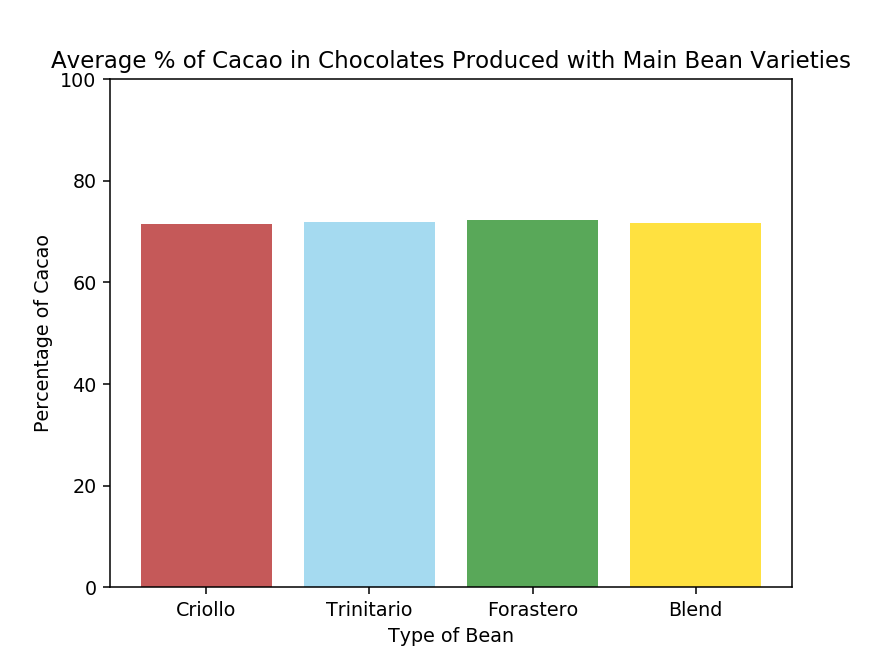

<BarContainer object of 4 artists>

In [24]:
plt.bar(x_axis, y_axis, color=['firebrick', 'skyblue', 'forestgreen', 'gold'], alpha=.75, align="center")

In [26]:
plt.title("Average % of Cacao in Chocolates Produced with Main Bean Varieties")
plt.xlabel("Type of Bean")
plt.ylabel("Percentage of Cacao")

Text(52.6181,0.5,'Percentage of Cacao')

In [27]:
# plt.title("Average Rating of Chocolates Produced with Main Bean Varieties")
# plt.xlabel("Type of Bean")
# plt.ylabel("Rating")

In [28]:
# plt.title("Number of Chocolates Produced with Main Bean Varieties")
# plt.xlabel("Type of Bean")
# plt.ylabel("Number of Chocolates")

In [29]:
# plt.savefig("Images/BDM Average Percent of Cacao in Chocolates Produced with Main Bean Varieties.png")

In [76]:
# plt.savefig("Images/BDM Average Rating of Chocolates Produced with Main Bean Varieties.png")

In [ ]:
# plt.savefig("Images/BDM Number of Chocolates Produced with Main Bean Varieties.png")